In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('client_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
print(df.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t

In [ ]:
#See the missing values
pd.DataFrame({"Missing value (%)": df.isnull().sum()/len(df.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


                                Missing value (%)
id                                            0.0
channel_sales                                 0.0
cons_12m                                      0.0
cons_gas_12m                                  0.0
cons_last_month                               0.0
date_activ                                    0.0
date_end                                      0.0
date_modif_prod                               0.0
date_renewal                                  0.0
forecast_cons_12m                             0.0
forecast_cons_year                            0.0
forecast_discount_energy                      0.0
forecast_meter_rent_12m                       0.0
forecast_price_energy_off_peak                0.0
forecast_price_energy_peak                    0.0
forecast_price_pow_off_peak                   0.0
has_gas                                       0.0
imp_cons                                      0.0
margin_gross_pow_ele                          0.0


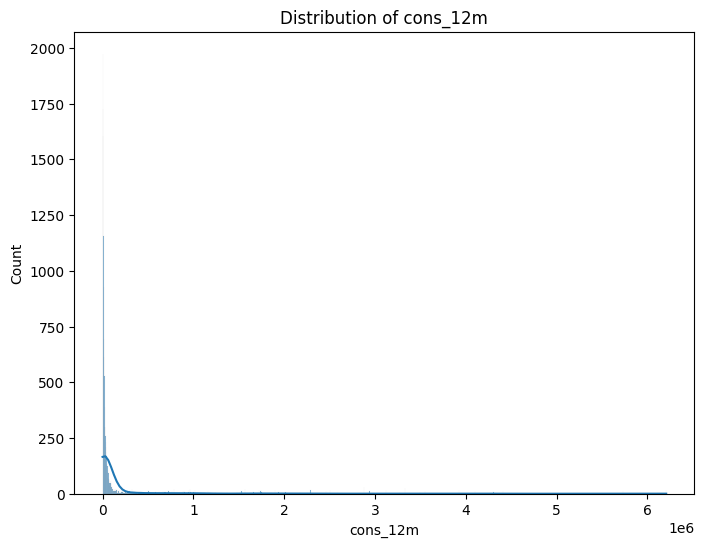

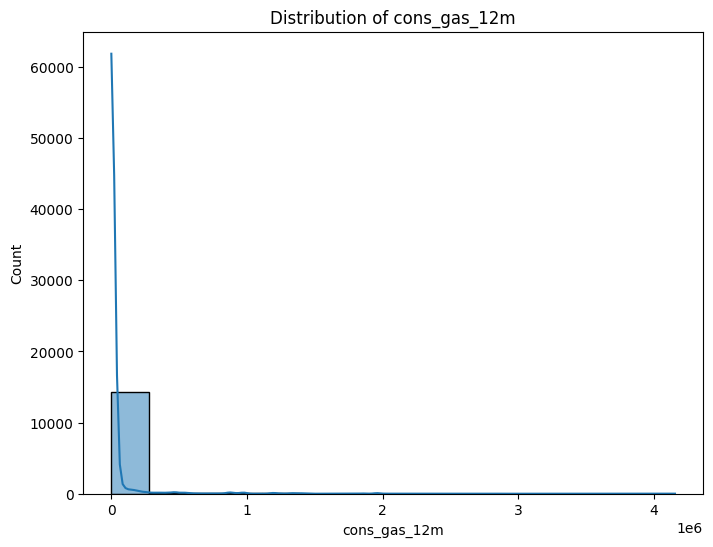

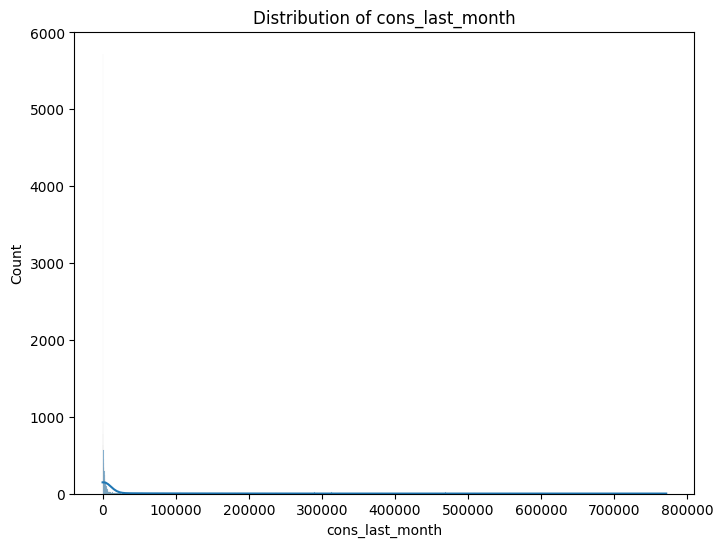

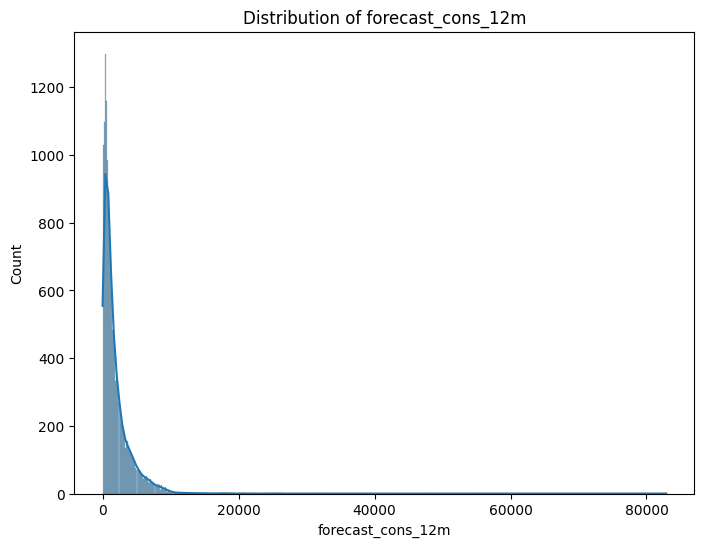

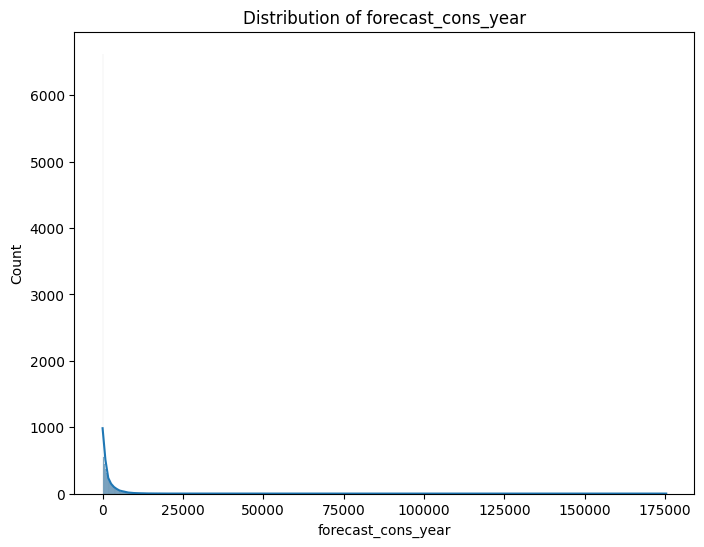

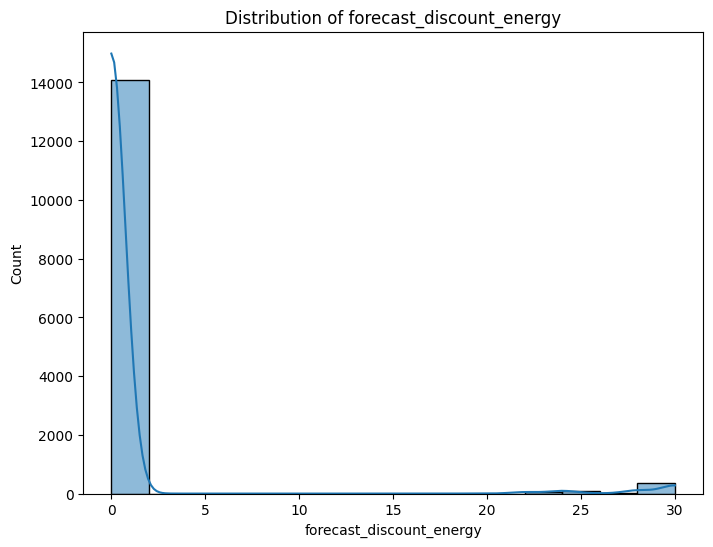

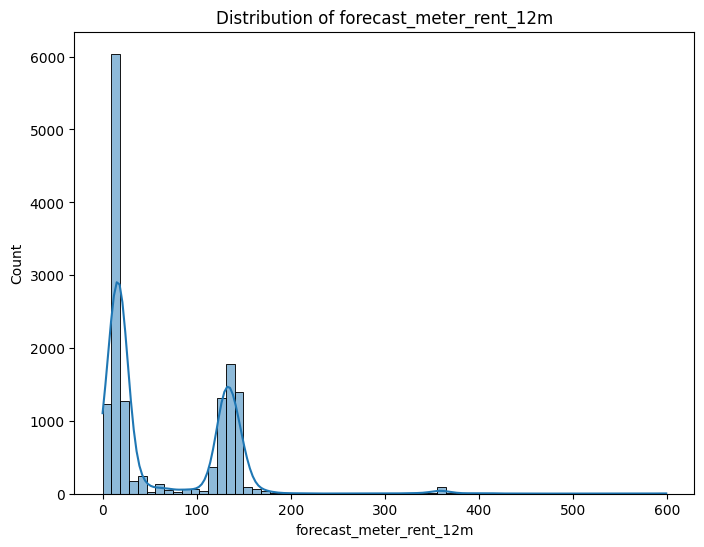

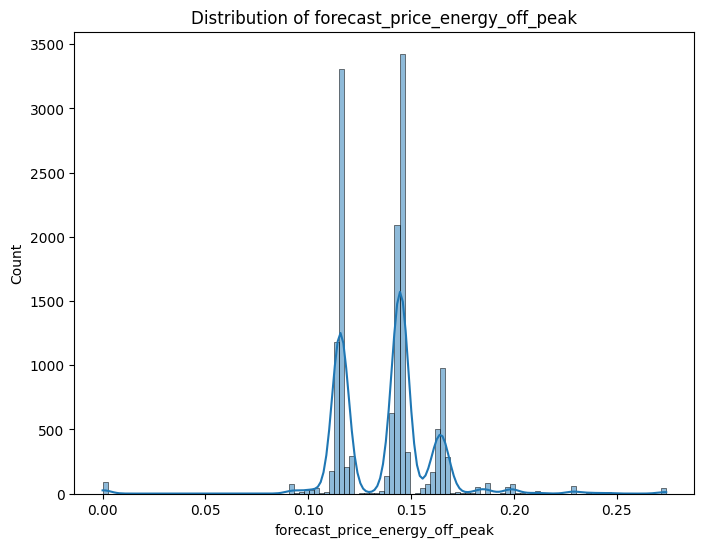

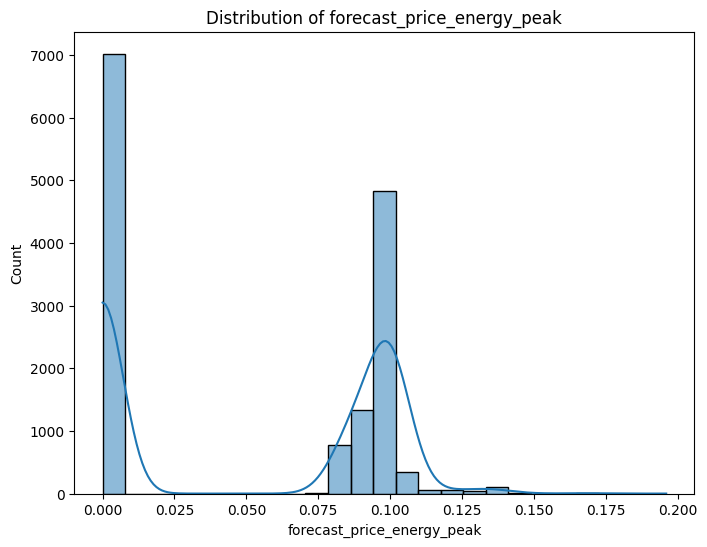

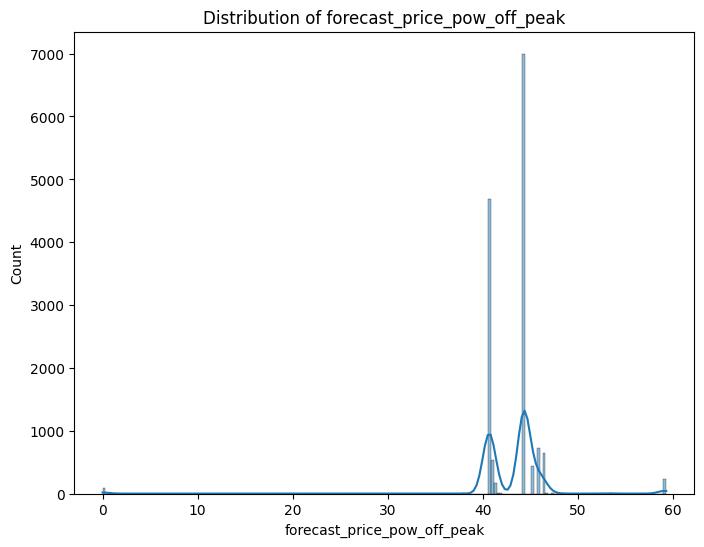

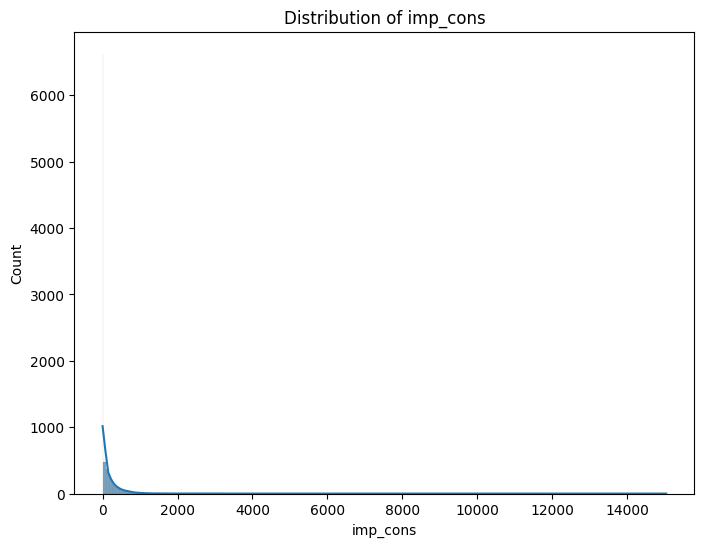

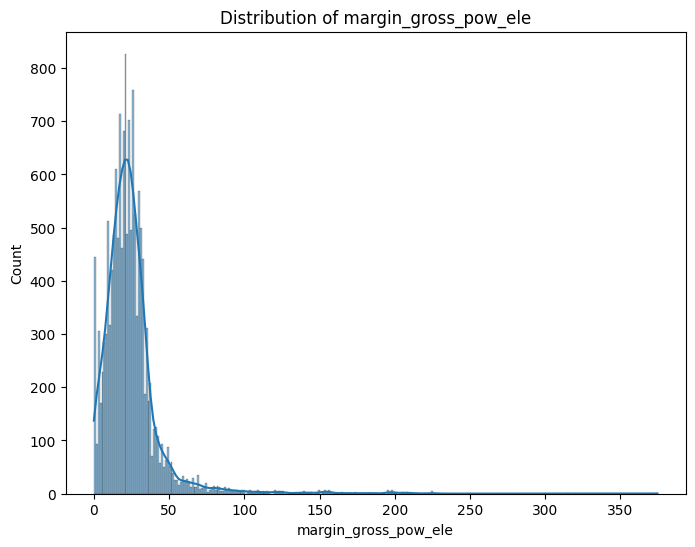

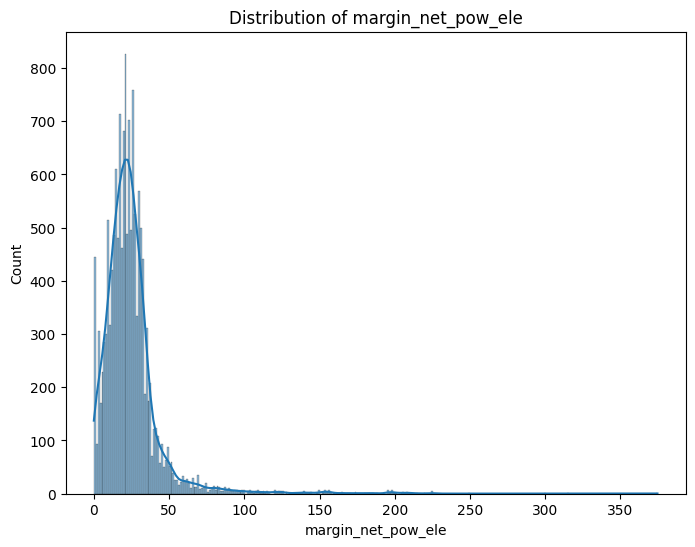

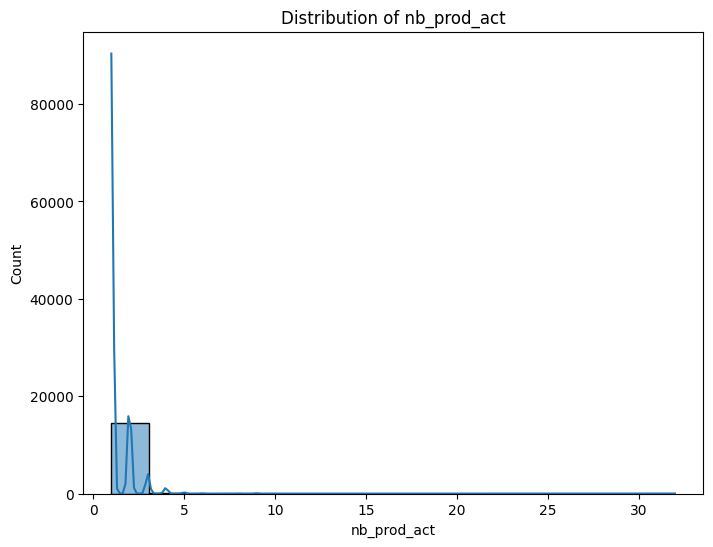

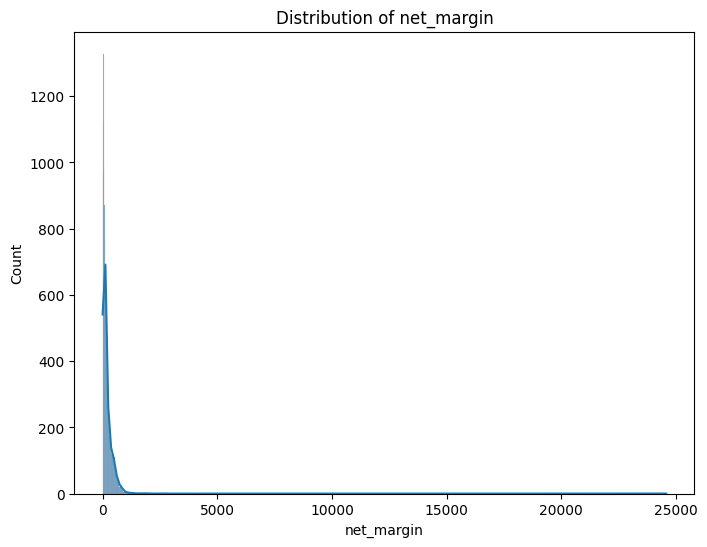

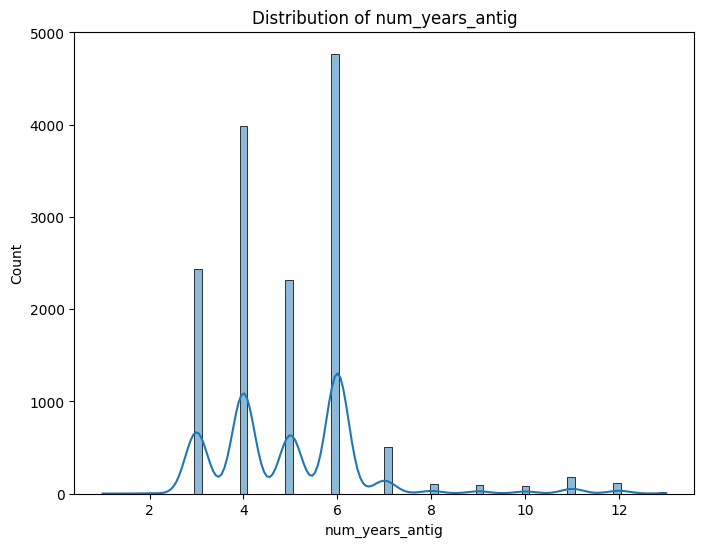

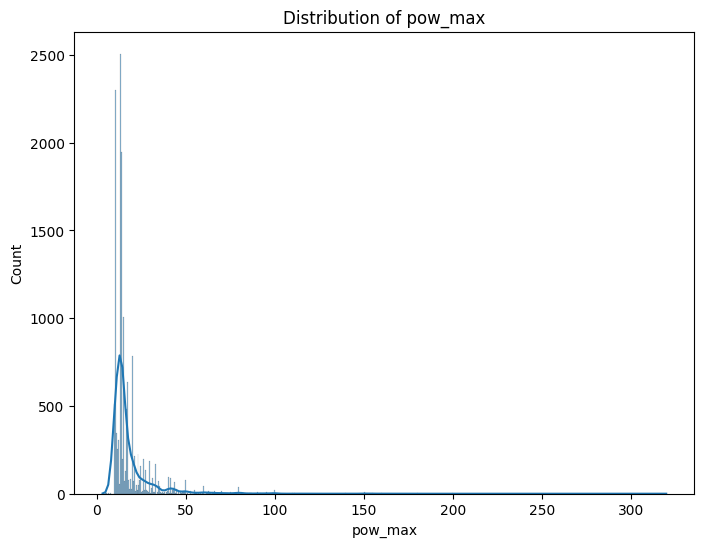

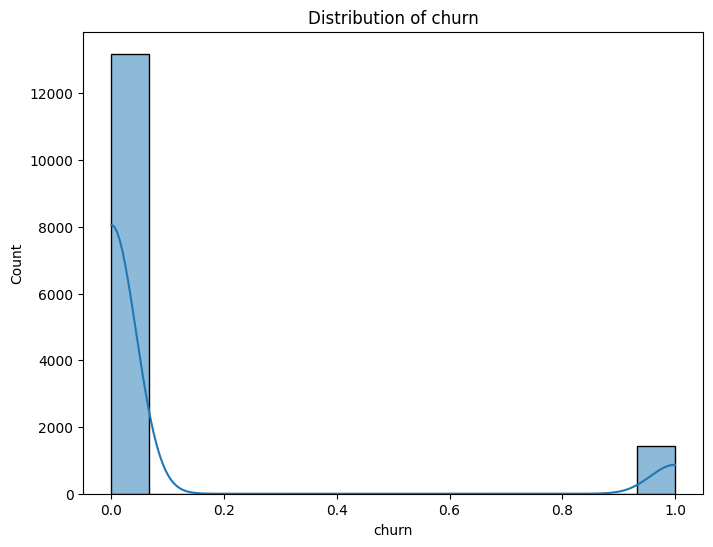

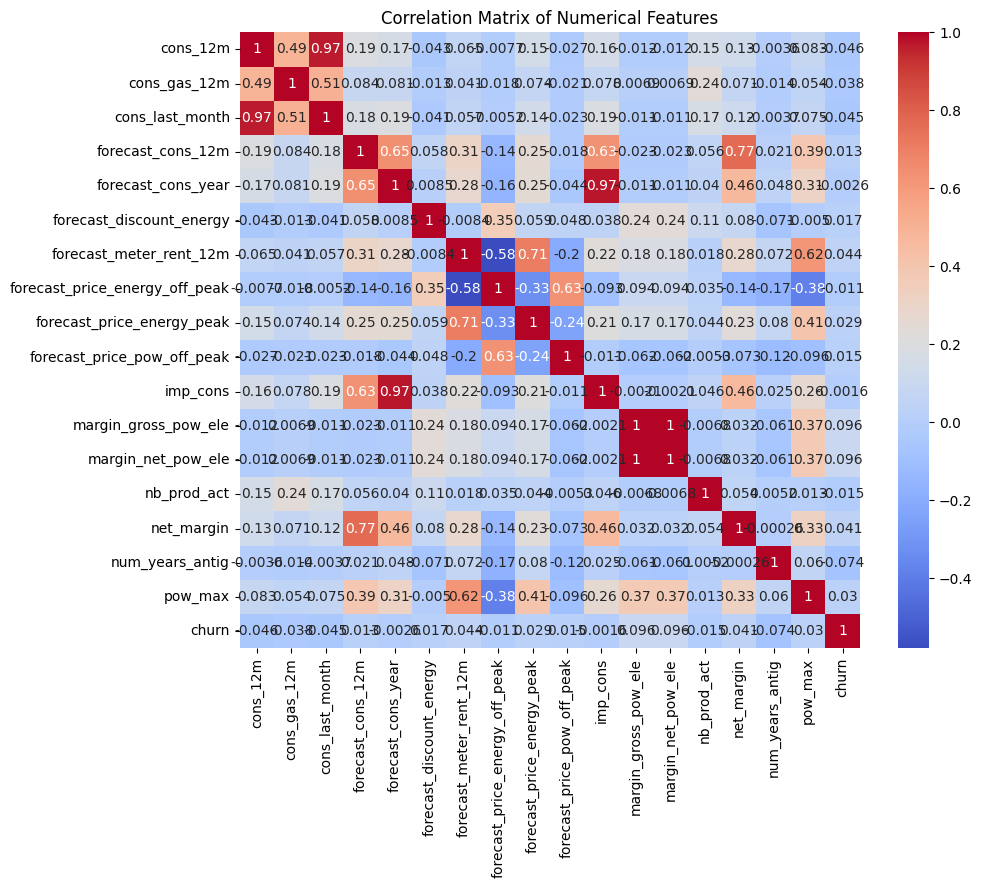

In [ ]:
#Missing Values
missing_values = pd.DataFrame({"Missing value (%)": df.isnull().sum()/len(df.index)*100})
print(missing_values)


#Distribution of Numerical Features
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


#Relationship between Numerical Features (Correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#Importing all the necessary libraries
warnings.filterwarnings('ignore')
df = pd.read_csv('client_data.csv')

# Encode categorical features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check for class imbalance
print(df['churn'].value_counts())

# Oversampling using SMOTE if
if df['churn'].value_counts().min() / df['churn'].value_counts().max() < 0.2 : # Example threshold
  print("Performing oversampling using SMOTE.")
  smote = SMOTE(random_state=42)
  X = df.drop('churn', axis=1)
  y = df['churn']
  X_resampled, y_resampled = smote.fit_resample(X, y)
  df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
  df_resampled['churn'] = y_resampled
  df = df_resampled
  print(df['churn'].value_counts())
else:
  print("No oversampling needed.")

churn
0    13187
1     1419
Name: count, dtype: int64
Performing oversampling using SMOTE.
churn
1    13187
0    13187
Name: count, dtype: int64


In [ ]:
#Univariate Analysis for GPA column
import pandas as pd
data = pd.read_csv("client_data.csv")

#Calculating mean, median and mode for GPA column for Univariate analysis
mean = data['pow_max'].mean()
print("Mean power max is: ",mean)

#Median GPA
median = data['pow_max'].median()
print("Median power max is: ",median)


#Mode GPA
mode = data['pow_max'].mode()
print("Mode max is: ",mode)


#Calculate standard deviation
std = data['pow_max'].std()
print("Standard Deviation for pow_max column is : ",std)

#Interpretations about mean, median and mode are given below

Mean power max is:  18.13513562919348
Median power max is:  13.856
Mode max is:  0    13.2
Name: pow_max, dtype: float64
Standard Deviation for pow_max column is :  13.53474337353618


Frequency Table is as follows  pow_max
13.200    2124
10.392    2000
13.856    1504
15.000     583
10.350     480
          ... 
19.410       1
11.540       1
55.360       1
17.570       1
48.078       1
Name: count, Length: 698, dtype: int64

Boxplot is as follows ->

Histogram is as follows ->


array([[<Axes: title={'center': 'pow_max'}>]], dtype=object)

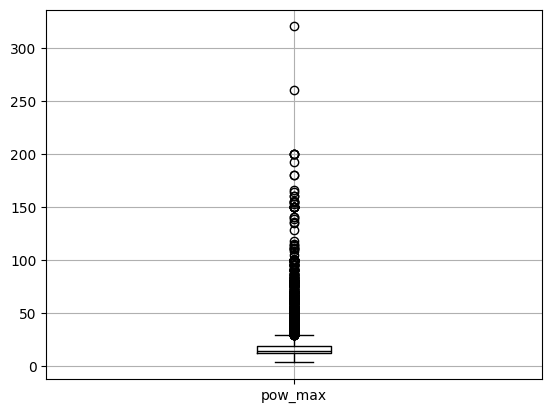

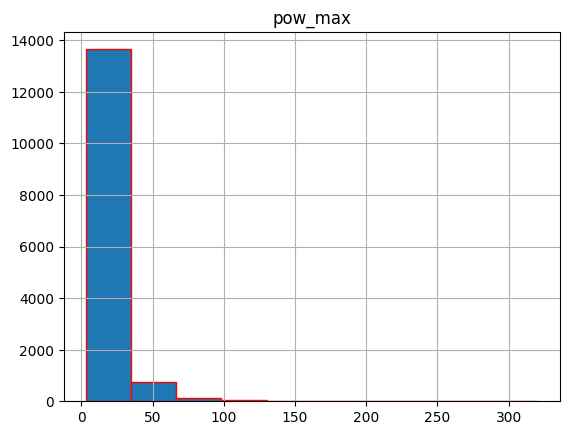

In [ ]:
#Visualising data using a freuqency table, boxplot, histogram and density curve
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("client_data.csv")

#Frequency Table
freq_table = data['pow_max'].value_counts()
print("Frequency Table is as follows ", freq_table)

#Boxplot
print("\nBoxplot is as follows ->")
data.boxplot(column = ['pow_max'], grid = True, color = 'black')

#Histogram
print("\nHistogram is as follows ->")
data.hist(column = ['pow_max'], grid = True, edgecolor = 'red')

#The histogram and the boxplot have been plotted below


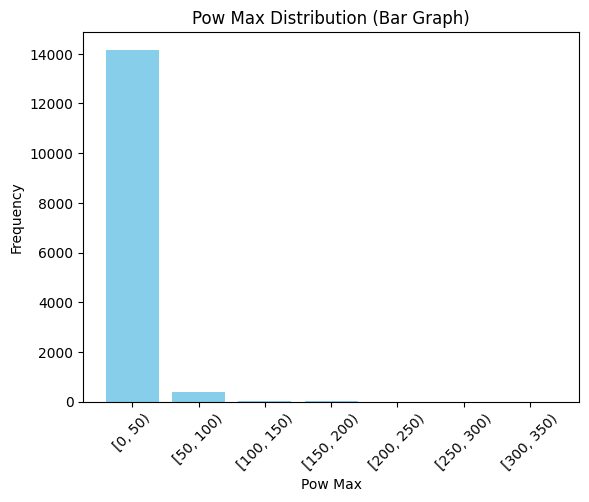

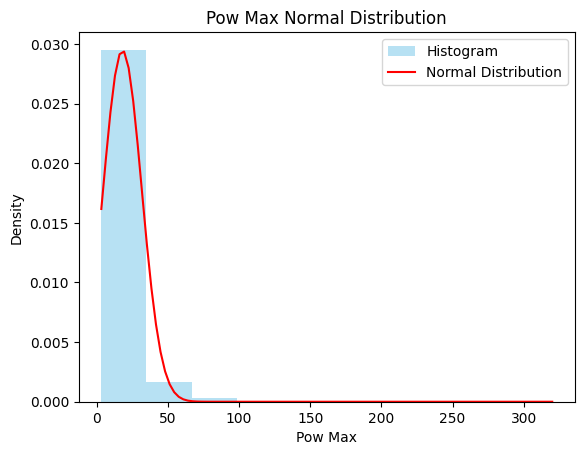

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load dataset
data = pd.read_csv('client_data.csv')

pow_max_original = data['pow_max'] # Store original pow_max values

# Define bins for grouping pow_max values
bins = [0, 50,100,150,200,250,300,350]  # Adjusted based on your dataset
pow_max_binned = pd.cut(pow_max_original, bins=bins, right=False) # Use a new variable for binned data

# Count the number of pow_max in each bin
pow_max_counts = pow_max_binned.value_counts().sort_index()  # Use a new variable for counts


# Plot bar graph
plt.bar(pow_max_counts.index.astype(str), pow_max_counts, color='skyblue') # Use pow_max_counts
plt.title('Pow Max Distribution (Bar Graph)')
plt.xlabel('Pow Max')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Calculate mean and standard deviation
mean = pow_max_original.mean() # Calculate mean from original data
std_dev = pow_max_original.std() # Calculate std from original data

# Generate data for the normal distribution curve
x = np.linspace(pow_max_original.min(), pow_max_original.max(), 100) # Use original data for range
y = norm.pdf(x, mean, std_dev)

# Plot the histogram for GPA
plt.hist(pow_max_original, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram') # Use original data

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution')

# Add titles and labels
plt.title('Pow Max Normal Distribution')
plt.xlabel('Pow Max')
plt.ylabel('Density')
plt.legend()
plt.show()

#We have plotted the GPA distribution in the form of a bar graph

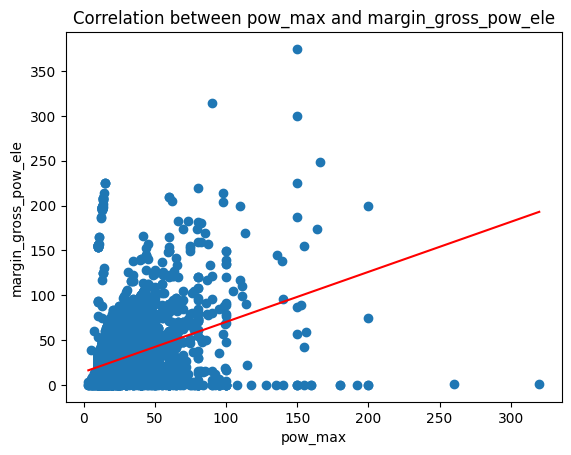

In [ ]:
#Bivariate Analysis for columns GPA and GMAT score
#Scatterplot for correlation mapping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('client_data.csv')

# Extract pow_max and margin_gross_pow_ele  columns
x = data['pow_max']  # Independent variable
y = data['margin_gross_pow_ele']  # Dependent variable

# Scatter plot
plt.scatter(x, y, label="Data points")

# Fit line
coefficients = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear fit)
poly = np.poly1d(coefficients)

# Plot the best-fit line
plt.plot(np.unique(x), poly(np.unique(x)), color='red', label="Best-fit line")

# Add titles and labels
plt.title('Correlation between pow_max and margin_gross_pow_ele')
plt.xlabel('pow_max')
plt.ylabel('margin_gross_pow_ele')

# Display plot
plt.show()

#The correlation between pow_max and margin_gross_pow_ele socre is a positive one according to the scatter plot

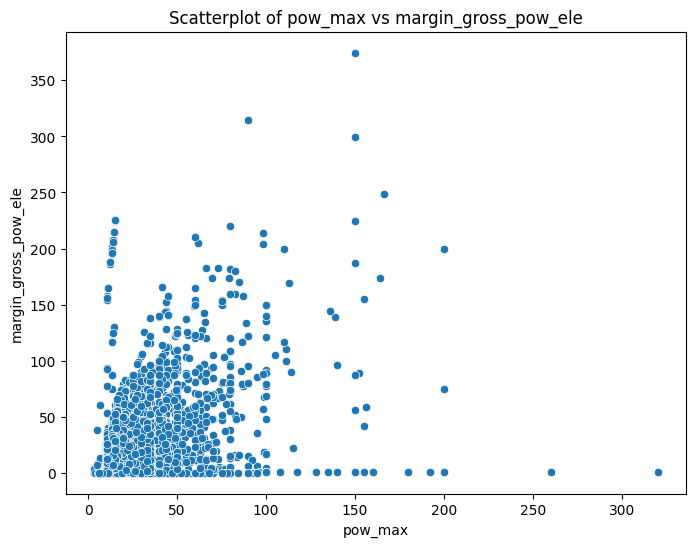

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mba = pd.read_csv("client_data.csv")

# Replace missing values in numeric columns with their mean
for col in mba.select_dtypes(include=['number']).columns:
    mba[col].fillna(mba[col].mean(), inplace=True)

# Scatterplot for analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pow_max', y='margin_gross_pow_ele', data=mba)

# Add title and labels
plt.title('Scatterplot of pow_max vs margin_gross_pow_ele')
plt.xlabel('pow_max')
plt.ylabel('margin_gross_pow_ele')

# Show the plot
plt.show()

#We have described the comparison between 2 columns using pow_max and margin_gross_pow_ele with a scatterplot


<Axes: xlabel='churn', ylabel='pow_max'>

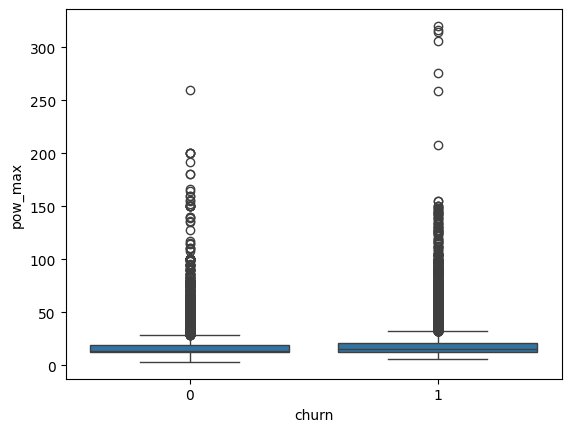

In [ ]:
#Visualisation using boxplot
sns.boxplot(x='churn', y='pow_max', data=df)

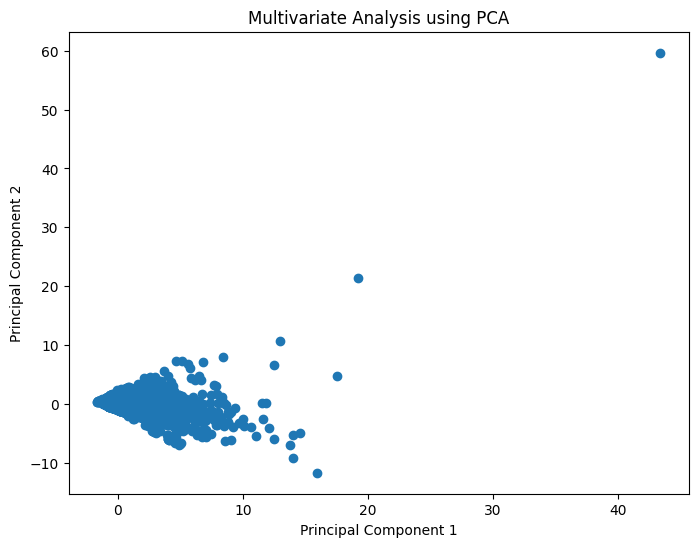

array([0.50375054, 0.3228286 ])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('client_data.csv')

# Select four numerical columns for analysis
numerical_cols = ['pow_max', 'margin_gross_pow_ele', 'net_margin', 'forecast_price_energy_p1']

# Now fill NaN with the mean of each numerical column (for existing columns only)
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Scale the data
scaler = StandardScaler()
# Use only existing numerical columns for scaling
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
scaled_data = scaler.fit_transform(df[existing_numerical_cols])

# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Multivariate Analysis using PCA')
plt.show()

# Explained variance ratio
pca.explained_variance_ratio_

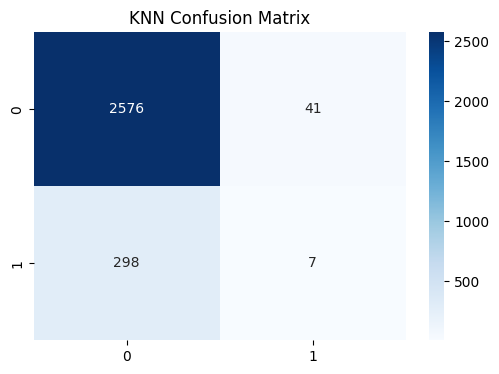

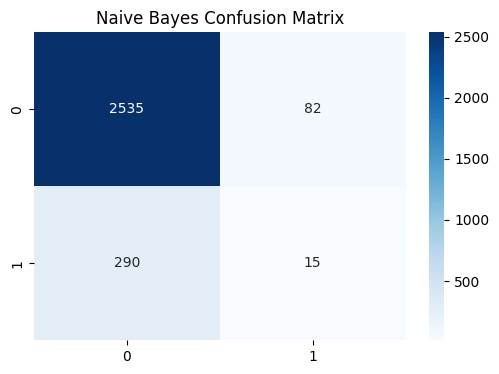

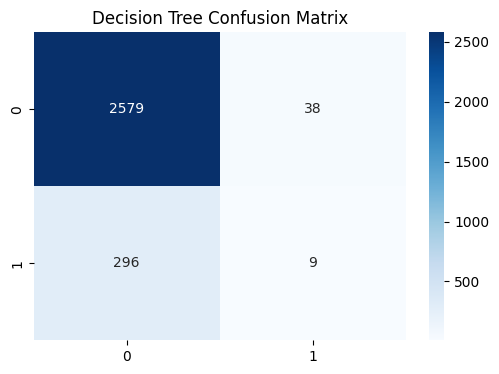

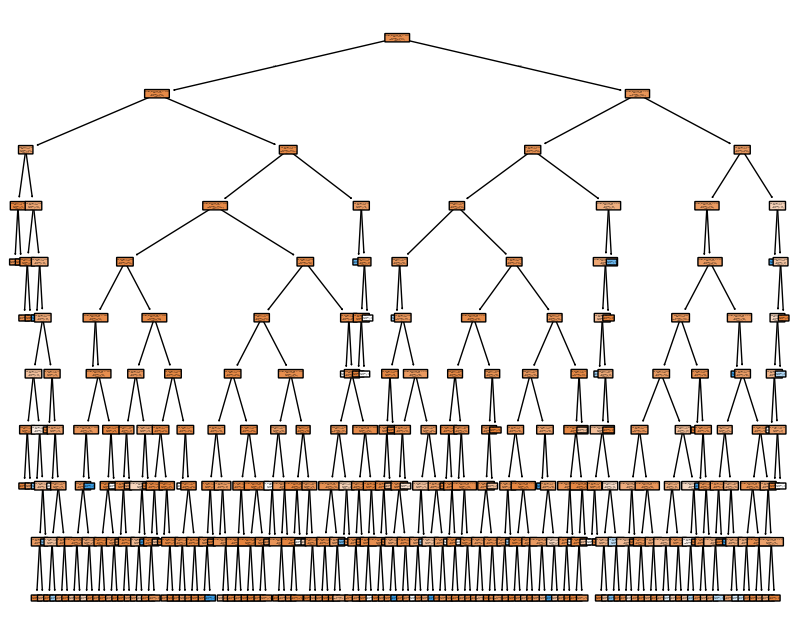

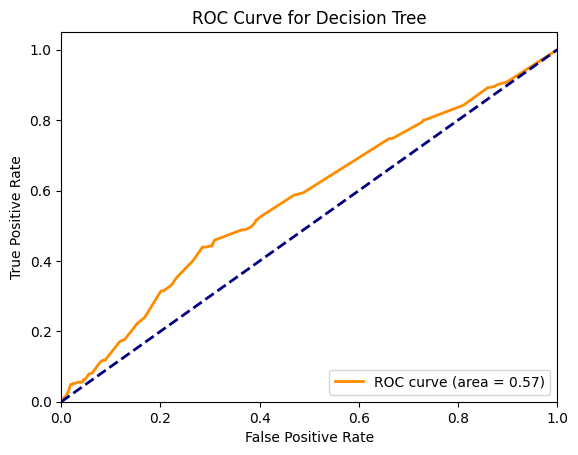

KNN Accuracy: 0.8839835728952772
Naive Bayes Accuracy: 0.8726899383983573
Decision Tree Accuracy: 0.8856947296372347
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2617
           1       0.15      0.02      0.04       305

    accuracy                           0.88      2922
   macro avg       0.52      0.50      0.49      2922
weighted avg       0.82      0.88      0.84      2922

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2617
           1       0.15      0.05      0.07       305

    accuracy                           0.87      2922
   macro avg       0.53      0.51      0.50      2922
weighted avg       0.82      0.87      0.84      2922

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      2617
           1      

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('client_data.csv')

# Feature selection
# Select relevant features for prediction, ensuring they exist in the DataFrame
features = ['pow_max', 'margin_gross_pow_ele', 'net_margin']  # Removed 'forecast_price_energy_p1'
# Check if 'forecast_price_energy_p1' exists before adding it to features
if 'forecast_price_energy_p1' in df.columns:
    features.append('forecast_price_energy_p1')

X = df[features]
y = df['churn']  # Assuming 'churn' is your target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Decision Tree with pre-pruning and post-pruning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)


#Visualizations
#Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True,fmt="d", cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.show()

#Confusion Matrix for NB
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True,fmt="d", cmap="Blues")
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#Confusion Matrix for DT
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.show()

#Plot Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(best_dt, filled=True, feature_names=features, class_names=['0','1'], rounded=True)
plt.show()

#ROC Curve for Decision Tree
fpr, tpr, thresholds = roc_curve(y_test, best_dt.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Evaluation metrics (accuracy, classification report)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

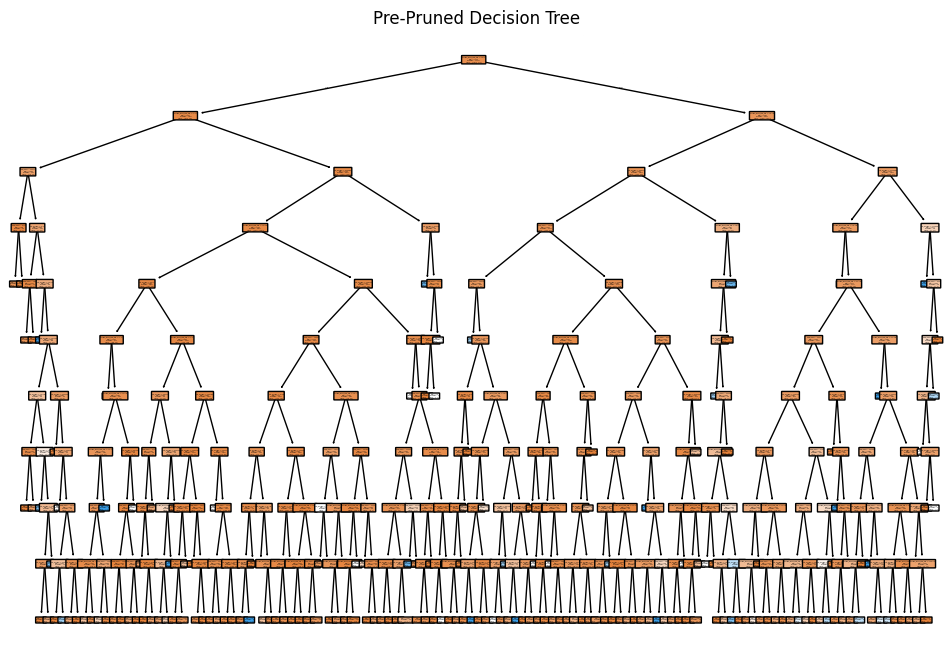

Pre-pruned Decision Tree Accuracy: 0.8856947296372347


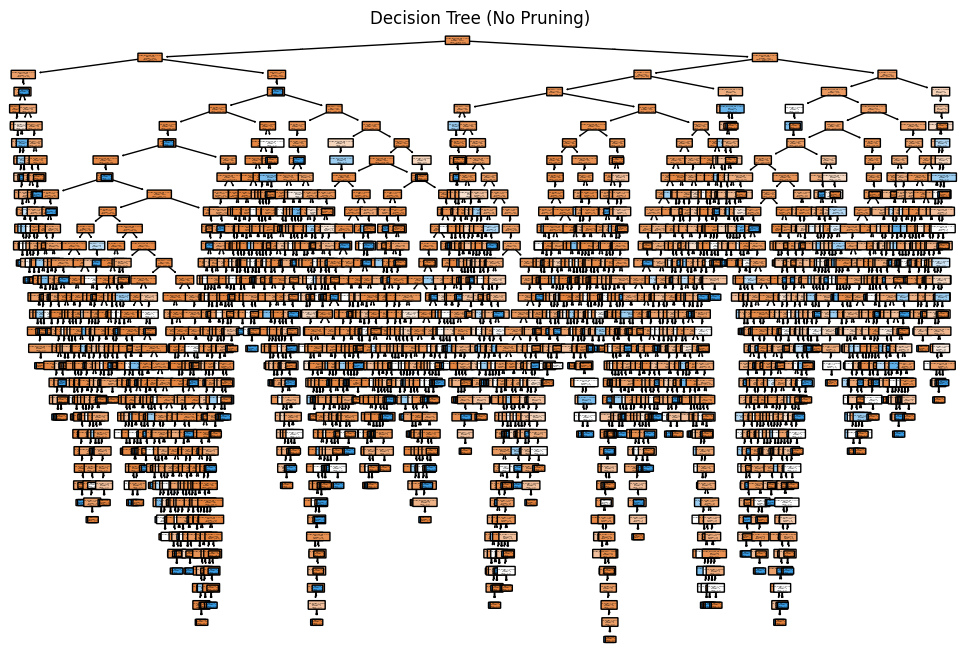

Decision Tree (No Pruning) Accuracy: 0.8220396988364134


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('client_data.csv')

# Preprocessing (assuming similar preprocessing as in your example)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Feature selection (adjust features as needed)
features = ['pow_max', 'margin_gross_pow_ele', 'net_margin']
X = df[features]
y = df['churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with pre-pruning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_pre = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_pre, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt_pre = grid_search.best_estimator_
y_pred_pre = best_dt_pre.predict(X_test)

# Visualize the pre-pruned tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_pre, filled=True, feature_names=features, class_names=['0', '1'], rounded=True)
plt.title("Pre-Pruned Decision Tree")
plt.show()

# Evaluate pre-pruned tree
accuracy_pre = accuracy_score(y_test, y_pred_pre)
print(f"Pre-pruned Decision Tree Accuracy: {accuracy_pre}")


# Decision Tree without pruning (for comparison)
dt_no_prune = DecisionTreeClassifier(random_state=42)
dt_no_prune.fit(X_train, y_train)
y_pred_no_prune = dt_no_prune.predict(X_test)

# Visualize the unpruned tree
plt.figure(figsize=(12,8))
plot_tree(dt_no_prune, filled=True, feature_names=features, class_names=['0', '1'], rounded=True)
plt.title("Decision Tree (No Pruning)")
plt.show()

accuracy_no_prune = accuracy_score(y_test, y_pred_no_prune)
print(f"Decision Tree (No Pruning) Accuracy: {accuracy_no_prune}")

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.50      0.01      0.01       305

    accuracy                           0.90      2922
   macro avg       0.70      0.50      0.48      2922
weighted avg       0.85      0.90      0.85      2922

Accuracy: 0.8956194387405887


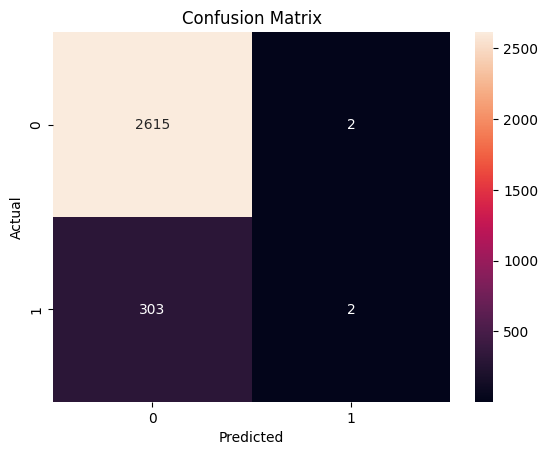

,Feature,Coefficient
1,margin_gross_pow_ele,0.245185
2,net_margin,0.123920
0,pow_max,-0.076606


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('client_data.csv')

# Handle missing values (replace with mean for numerical columns)
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Feature selection
features = ['pow_max', 'margin_gross_pow_ele', 'net_margin']
if 'forecast_price_energy_p1' in df.columns:
    features.append('forecast_price_energy_p1')
X = df[features]
y = df['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyze feature importance (coefficients for Logistic Regression)
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance




Random Forest Accuracy: 0.8699520876112252
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2617
           1       0.22      0.10      0.13       305

    accuracy                           0.87      2922
   macro avg       0.56      0.53      0.53      2922
weighted avg       0.83      0.87      0.85      2922



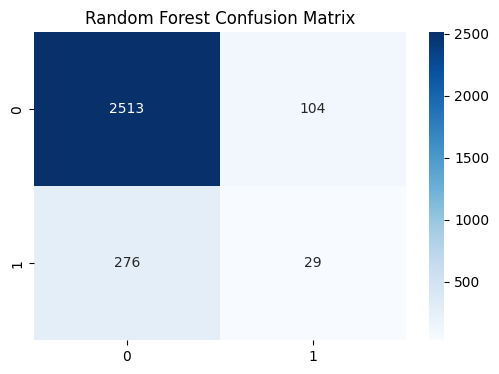

Feature Importance:
 net_margin              0.607517
margin_gross_pow_ele    0.232387
pow_max                 0.160097
dtype: float64


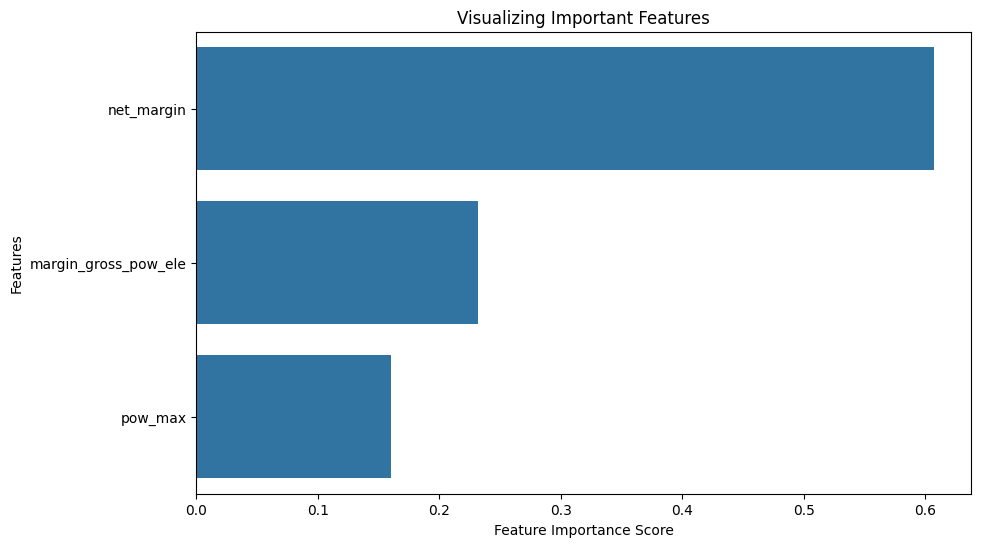

In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = ['pow_max', 'margin_gross_pow_ele', 'net_margin']
if 'forecast_price_energy_p1' in df.columns:
    features.append('forecast_price_energy_p1')
X = df[features]
y = df['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature Importance
feature_imp = pd.Series(rf_classifier.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance:\n", feature_imp)

# Visualize Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#Interpretations
#Based on the below confusion matrix and bar plot, we see that the accuracy comes out to be 0.8699520876112252 for the model
#We also see that  for feature importance net_margin has  a score of 0.607517 and margin_gross_pow_ele has a score of 0.232387 and pow_max has a score of 0.160097

In [ ]:

import pandas as pd


df = pd.read_csv('client_data.csv')
 # 1 means customer is at churn risk and 0 means customer is not
churn_risk_customers = df[df['churn'] == 1]

# Create a table for customers NOT at churn risk
no_churn_risk_customers = df[df['churn'] == 0]


print("Customers at Churn Risk:")
print(churn_risk_customers)

print("\nCustomers NOT at Churn Risk:")
print(no_churn_risk_customers)


from IPython.display import display

display(pd.DataFrame(churn_risk_customers))
display(pd.DataFrame(no_churn_risk_customers))

Customers at Churn Risk:
                                     id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
5      1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
6      7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   
25     389bbbe70248fbeecdf9bb1bd0d1da04  foosdfpfkusacimwkcsosbicdxkicaua   
30     44e826a55734d0ca5eeafcae0e991a75  foosdfpfkusacimwkcsosbicdxkicaua   
...                                 ...                               ...   
14587  1adf14d41e4c3bbb48635ada51ed3a83  foosdfpfkusacimwkcsosbicdxkicaua   
14588  2610e546b6d546f724cb0397dca1a14e  usilxuppasemubllopkaafesmlibmsdf   
14593  c525fcb0860e5705d37743f5b5cadbfe  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   

       cons_12m  cons_gas_12m  cons_last_month  da

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
25,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,f,32.61,57.72,57.72,1,38.76,5,lxidpiddsbxsbosboudacockeimpuepw,23.100,1
30,44e826a55734d0ca5eeafcae0e991a75,foosdfpfkusacimwkcsosbicdxkicaua,324,0,0,2009-07-07,2016-07-07,2015-05-23,2015-07-09,8.32,...,f,0.00,18.62,18.62,2,1.27,7,ldkssxwpmemidmecebumciepifcamkci,13.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,1adf14d41e4c3bbb48635ada51ed3a83,foosdfpfkusacimwkcsosbicdxkicaua,2013,0,0,2011-11-14,2016-11-14,2014-02-17,2015-11-17,304.55,...,f,0.00,21.09,21.09,1,36.26,4,lxidpiddsbxsbosboudacockeimpuepw,10.392,1
14588,2610e546b6d546f724cb0397dca1a14e,usilxuppasemubllopkaafesmlibmsdf,5286,0,0,2013-01-09,2017-01-09,2015-11-18,2016-01-10,806.19,...,f,0.00,33.12,33.12,1,97.07,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1
14593,c525fcb0860e5705d37743f5b5cadbfe,foosdfpfkusacimwkcsosbicdxkicaua,3909,0,155,2012-10-23,2016-11-12,2015-09-19,2015-11-13,327.17,...,f,0.00,7.32,7.32,1,23.29,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,1
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,46362cb1ad2fcdad347a6fa1bc1e5d4b,foosdfpfkusacimwkcsosbicdxkicaua,18163,3036,0,2010-01-26,2017-01-26,2015-11-17,2016-01-27,2663.82,...,t,0.00,31.20,31.20,3,254.81,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
14600,c49217f16a06263e5381eaba94a67a8b,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,...,f,71.81,66.00,66.00,1,87.14,3,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
